In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm
import random

# Задание

### Основная часть

* Проанализируйте и опишите данный датасет, используя все возможные графики из тех, что были на уроке Matplotlib, Seaborn, Plotly
* Используйте также описательные статистики
* У каждого построенного графика должен быть соответствующий вывод, который описывает наблюдение или инсайт

### Загрузка данных

Полученный датасет имеет 50000 строк и 28 столбцов. Каждая строка представляет клиента банка, а в каждом столбце содержатся количественные или категориальные признаки для каждого клиента.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [2]:
df = pd.read_csv('C:/Users/150ho/Desktop/test_cluster.csv', encoding='cp1251', sep=';')

In [3]:
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [4]:
# размер таблицы
df.shape

(50000, 28)

In [5]:
# основная информация по таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

In [6]:
# описательные статистики таблицы
df.describe()

,age,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
count,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,5.000000e+04,5.000000e+04,...,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,3820.000000,3.212800e+04,3.151500e+04,4.756900e+04
mean,41.524480,53.642820,1.288144e+04,6.033691e+04,8.126498e+04,7.002303e+04,6.860816e+04,105.011400,2.207407e+05,2.600832e+04,...,7.534701e+04,8.875132e+04,7.891208e+04,5.556172e+04,6.509508e+04,5.534414e+04,18.236559,5.279361e+03,3.384532e+02,1.205378e+04
std,12.866034,47.430416,1.874505e+05,2.017564e+05,2.860175e+05,1.679410e+06,1.748867e+06,192.687683,6.008022e+05,4.359979e+05,...,2.758174e+05,3.004066e+05,2.749138e+05,1.896891e+05,2.113224e+05,1.725155e+05,269.329001,1.598972e+04,2.936955e+04,4.532125e+04
min,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.684957e-04
25%,32.000000,13.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.400000e+01,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,8.143703e+02,8.005211e-02,2.695975e+02
50%,40.000000,37.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.600000e+02,14.000000,3.500108e+04,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.716181e+03,3.017687e-01,1.379604e+03
75%,51.000000,81.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.762365e+03,122.000000,2.603239e+05,3.162002e+04,...,0.000000e+00,0.000000e+00,3.868709e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,4.416583e+03,1.532015e+00,9.781835e+03
max,98.000000,236.000000,1.467568e+07,7.354568e+06,1.467568e+07,3.305000e+08,2.474474e+08,2970.000000,3.634105e+07,9.060000e+07,...,1.467568e+07,1.481199e+07,1.502391e+07,5.646888e+06,7.501889e+06,4.112823e+06,12521.279170,1.749500e+06,5.000000e+06,4.691796e+06


In [8]:
# В таблице несколько столбцов с отсутствующими значениями:
# 1. Столбец «gender» имеет 723 пропущенных значения
# 2. Столбец «loan_to_deposit» - 46180 п-
# 3. Столбец «Avg_trx» - 17872 
# 4. Столбец «avgtrx_to_balance» — 18485
# 5. Столбец «nbi» - 2431
df.isnull().sum()

age                        0
gender                   723
city_type                  0
full_mob                   0
ml_balance                 0
cl_balance_0m              0
loan_balance_0m            0
td_balance_0m              0
casa_balance_0m            0
dc_trx_cnt                 0
dc_trx_sum                 0
income                     0
min_casa_balance_1q        0
max_casa_balance_1q        0
avg_casa_balance_1Y        0
min_td_balance_1q          0
max_td_balance_1q          0
avg_td_balance_1Y          0
min_loan_balance_1q        0
max_loan_balance_1q        0
avg_loan_balance_1Y        0
min_cl_balance_1q          0
max_cl_balance_1q          0
avg_cl_balance_1Y          0
loan_to_deposit        46180
Avg_trx                17872
avgtrx_to_balance      18485
nbi                     2431
dtype: int64

Text(0.5, 1.0, 'Пропущенные значения')

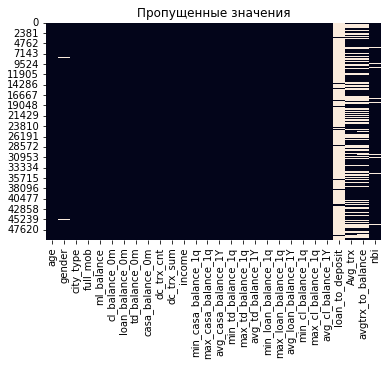

In [9]:
# Визуализация isnull
sns.heatmap(df.isnull(), cbar = False).set_title("Пропущенные значения")

Text(0.5, 1.0, 'Корреляция')

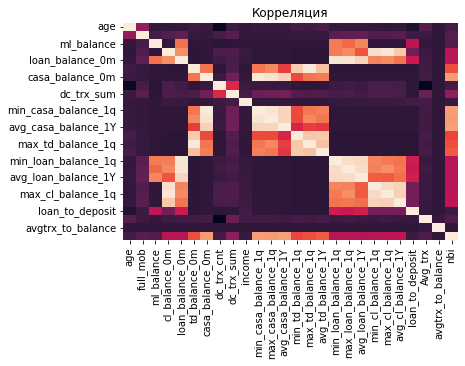

In [12]:
# Визуализация корреляции
sns.heatmap(df.corr(), cbar = False).set_title("Корреляция")

In [13]:
# Количество уникальных значений в каждом столбце
# Столбец «gender» имеет 2 возможных значения, «city_type» - 5
df.nunique()

age                       84
gender                     2
city_type                  5
full_mob                 185
ml_balance               575
cl_balance_0m           8177
loan_balance_0m        11077
td_balance_0m           1434
casa_balance_0m        36395
dc_trx_cnt              1204
dc_trx_sum             29266
income                 19630
min_casa_balance_1q    31824
max_casa_balance_1q    40854
avg_casa_balance_1Y    44790
min_td_balance_1q       1307
max_td_balance_1q       1532
avg_td_balance_1Y       2455
min_loan_balance_1q    10385
max_loan_balance_1q    11779
avg_loan_balance_1Y    13105
min_cl_balance_1q       7766
max_cl_balance_1q       8444
avg_cl_balance_1Y       9530
loan_to_deposit          346
Avg_trx                29748
avgtrx_to_balance      31399
nbi                    47242
dtype: int64

In [14]:
# Уникальные значения в столбцах (категориальные признаки)
for i in df.select_dtypes(include=[object]):
    print(i,":", df[i].unique())

gender : [nan 'М' 'F']
city_type : ['<100' 'Mega' '100-500' '1M+' '500-1000']


# Столбец "gender" - пол

In [15]:
# Количество мужчин и женщин
df['gender'].value_counts()

М    25403
F    23874
Name: gender, dtype: int64

In [16]:
# возрастные категории мужчин и женщин
def age_c(age):
    
    if age < 30:
        return 1
    elif age < 55:
        return 2
    elif age >= 55:
        return 3

df['age_c'] = df['age'].apply(age_c)
pd.crosstab(df['age_c'], df['gender'], margins=True)

gender,F,М,All
age_c,,,
1,4385,4596,8981
2,14990,16254,31244
3,4499,4553,9052
All,23874,25403,49277


In [17]:
# Заполнение недостающих значений столбца "gender" предыдущим заполненными значениями
df['gender'] = df['gender'].fillna(method='ffill')
df['gender'] = df['gender'].fillna('М')
df['gender'].value_counts()

М    25820
F    24180
Name: gender, dtype: int64

In [18]:
# устанавливаем "M" : 1 "F" : 0
def gender_10(gender):
    if gender == 'М': return 1
    else: return 0
    
df['gender_10'] = df['gender'].apply(gender_10)

In [19]:
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,age_c,gender_10
0,71,М,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,3,1
1,49,М,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952,2,1
2,56,М,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539,3,1
3,47,М,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556,2,1
4,74,М,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562,3,1


# Столбец "loan_to_deposit" - все кредиты

In [20]:
# Заполнение все недостающих значений нулями столбца "loan_to_deposit" 
df['loan_to_deposit'] = df['loan_to_deposit'].fillna(0)
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,age_c,gender_10
0,71,М,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3,1
1,49,М,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,28.762952,2,1
2,56,М,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,854.67,0.083467,1973.335539,3,1
3,47,М,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,364.008556,2,1
4,74,М,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,6651.416562,3,1


# Столбец "Avg_trx" - средний размер транзакции

In [21]:
# значение cтолбеца "Avg_trx" рассчитывается по формуле: dc_trx_sum / dc_trx_cnt, недостающие значения нулями
df['Avg_trx'] = df['dc_trx_sum'] / df[df['dc_trx_cnt'] != 0]['dc_trx_cnt']
df['Avg_trx'] = df['Avg_trx'].fillna(0)

# Столбец "avgtrx_to_balance"

In [22]:
# значение cтолбеца "Avg_trx" рассчитывается по формуле: Avg_trx / avg_casa_balance_1Y, недостающие значения нулями
df['avgtrx_to_balance'] = df['Avg_trx']/df[df['avg_casa_balance_1Y'] != 0]['avg_casa_balance_1Y']
df['avgtrx_to_balance'] = df['avgtrx_to_balance'].fillna(0)

# Столбец "nbi" - доход от клиента без OPEX

In [26]:
# заполнение пропущенных значений средней по столбцу
df['nbi'] = df['nbi'].fillna(df['nbi'].mean())

In [49]:
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,age_c
0,71,М,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,1379.603831,50+
1,49,М,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,28.762952,30-50
2,56,М,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,854.67,0.083467,1973.335539,50+
3,47,М,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,364.008556,30-50
4,74,М,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,6651.416562,50+


# Столбец "city_type" - Тип города проживания клиента

In [27]:
df['city_type'].value_counts()

<100        15421
100-500     10727
Mega         8954
1M+          7908
500-1000     6990
Name: city_type, dtype: int64

In [28]:
# устанавливаем "<100 " - 3, "100-500" - 0, "Mega" - 4, "1M+" - 1, "500-1000" - 2

def city_type_01234(city_type):
    if city_type == '100-500':
        return 0
    elif city_type == '1M+':
        return 1
    elif city_type == '500-1000':
        return 2
    elif city_type == '<100':
        return 3
    elif city_type == 'Mega':
        return 4
    
df['city_type_01234'] = df['city_type'].apply(city_type_01234)

In [29]:
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,age_c,gender_10,city_type_01234
0,71,М,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.00,0.000000,1379.603831,3,1,3
1,49,М,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.00,0.000000,28.762952,2,1,4
2,56,М,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,854.67,0.083467,1973.335539,3,1,4
3,47,М,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.00,0.000000,364.008556,2,1,4
4,74,М,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.00,0.000000,6651.416562,3,1,4


# Анализ данных

In [30]:
# Построим зависимости:
# - величины кредитов от длитености взаимоотношений с банком
# - величины кредитов от возраста
# - длительность отношений с банком от возраста

def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="full_mob",y="loan_balance_0m", hue=h, palette=pal, data=df, ax=ax1)
    sns.scatterplot(x="age",y="loan_balance_0m", hue=h, palette=pal, data=df, ax=ax2)
    sns.scatterplot(x="age",y="full_mob", hue=h, palette=pal, data=df, ax=ax3)
    plt.tight_layout()

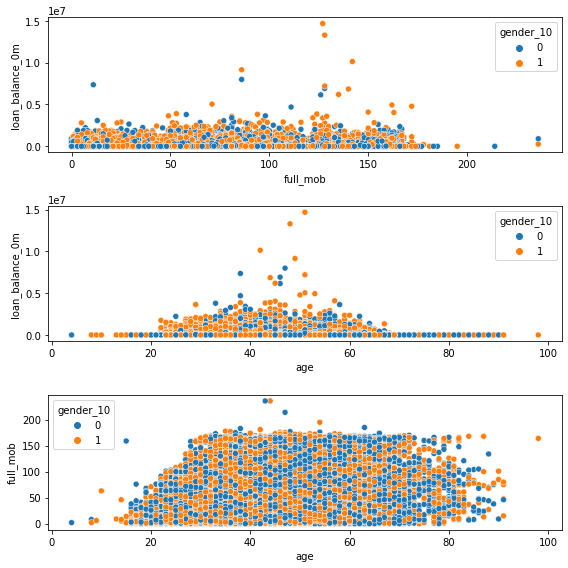

In [31]:
color = {1: 'green',0:'red'}
scatters(df, h=df["gender_10"], pal=None)

In [32]:
# Выводы:
# - самые большие кредиты взяты мужчинами
# - среди молодых больше кредитов у мужчин
# - отсутствуют зависимости между полом и длительностью контакта с банком и размером кредитов

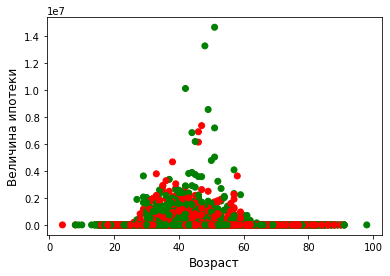

In [34]:
# Построим зависимости по величине ипотеки
fig, ax = plt.subplots()
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Величина ипотеки', fontsize=12)
ax.scatter(df["age"],df["ml_balance"],c=df['gender_10'].apply(lambda x: color[x]))
plt.show()

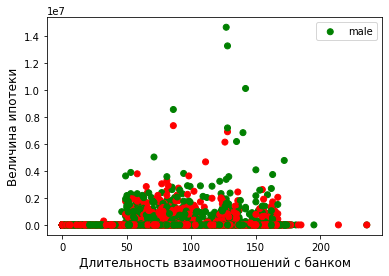

In [35]:
fig, ax = plt.subplots()
plt.xlabel('Длительность взаимоотношений с банком', fontsize=12)
plt.ylabel('Величина ипотеки', fontsize=12)
ax.scatter(df["full_mob"], df["ml_balance"],c=df["gender_10"].apply(lambda x: color[x]))
plt.gca().legend(('male','female'))
plt.show()

In [36]:
# Выводы:
# - самые большие ипотеки взяты мужчинами
# - ипотеку берут женщины и мужчины от 26 до 64 лет

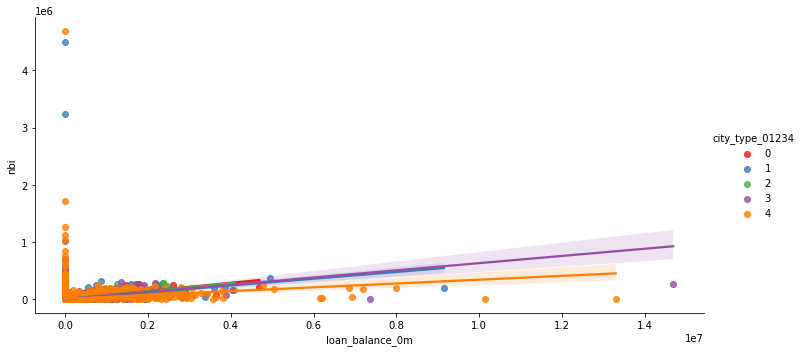

In [37]:
# Построим зависимости кредитов по городам
sns.lmplot(x="loan_balance_0m",y="nbi", hue="city_type_01234", data=df, palette="Set1", aspect=2)
plt.show()

In [38]:
# Выводы:
# - большые кредиты взяты в крупных городах и наоборот

In [39]:
# Добавим столбец, который показывает, есть ли кредиты у человека
df['n_loans'] = np.where(df['loan_balance_0m']!=0, 1, 0)
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,age_c,gender_10,city_type_01234,n_loans
0,71,М,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.00,0.000000,1379.603831,3,1,3,0
1,49,М,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.00,0.000000,28.762952,2,1,4,0
2,56,М,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,854.67,0.083467,1973.335539,3,1,4,0
3,47,М,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.00,0.000000,364.008556,2,1,4,0
4,74,М,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.00,0.000000,6651.416562,3,1,4,0


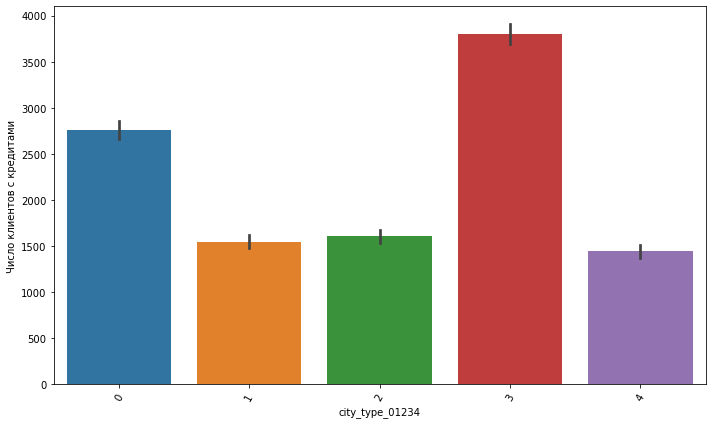

In [40]:
plt.figure(figsize=(10,6))
bar = sns.barplot(x="city_type_01234",y="n_loans",data=df, estimator=sum)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Число клиентов с кредитами")
plt.tight_layout()

In [41]:
# Вывод - больше всего людей, которые берут кредиты, в городах с численностью меньше 100 тыс человек

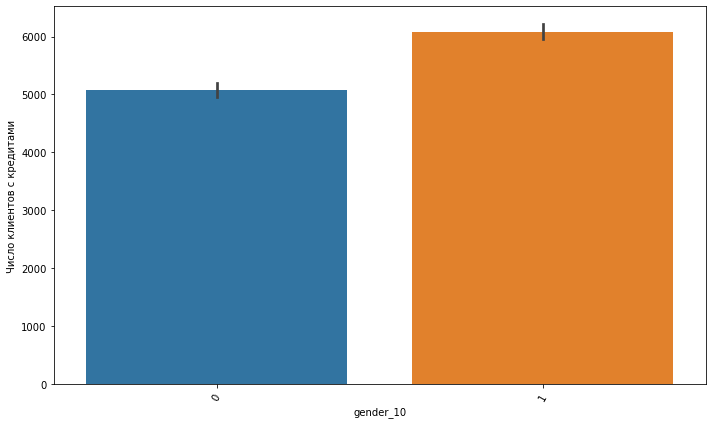

In [42]:
plt.figure(figsize=(10,6))
bar = sns.barplot(x="gender_10",y="n_loans",data=df, estimator=sum)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Число клиентов с кредитами")
plt.tight_layout()

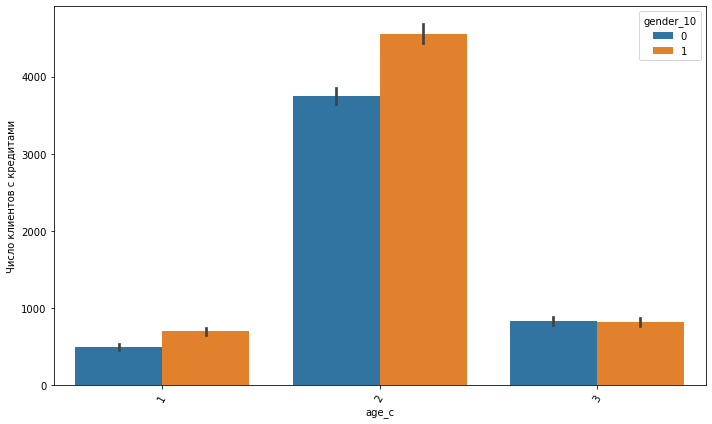

In [45]:
plt.figure(figsize=(10,6))
bar = sns.barplot(x="age_c",y="n_loans",data=df, estimator=sum, hue = 'gender_10')
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Число клиентов с кредитами")
plt.tight_layout()

In [ ]:
# Вывод - больше кредитов у людей среднего возраста